# TECH CHALLENGE - FASE I


###    TAREFAS:
####         Exploração de dados:
            ✓ Carregue a base de dados e explore suas características.
            ✓ Analise estatísticas descritivas e visualize distribuições relevantes.

####        Pré-processamento de dados:
            ✓ Realize a limpeza dos dados, tratando valores ausentes (se necessário).
            ✓ Converta variáveis categóricas em formatos adequados para modelagem.

####        Modelagem:
            ✓ Crie um modelo preditivo de regressão utilizando uma técnica à sua escolha (por exemplo, Regressão Linear, Árvores de Decisão, etc).
            ✓ Divida o conjunto de dados em conjuntos de treinamento e teste.

####        Treinamento e avaliação do modelo:
            ✓ Treine o modelo com o conjunto de treinamento.

####        Validação estatística:
            Utilize métricas estatísticas para validar a eficácia do modelo (p-value, intervalos de confiança).

####        O que avaliaremos:
            Apresente resultados visuais, como gráficos de previsões vs. valores reais.
            Elabore um relatório que inclua uma análise dos resultados, insights obtidos e validação estatística.

####        Observações:
            Esperamos que o modelo seja capaz de fazer previsões confiáveis dos custos médicos individuais com base nas características fornecidas.



### ENTREGÁVEL:

####    Como entregável, o grupo deve enviar um vídeo junto com o link do github do projeto e o código desenvolvido, apresentando o passo a passo do que foi utilizado como a fonte de dados e como os modelos foram criados.

####    O vídeo deve estar em uma plataforma como Youtube.

####    Boa sorte! Qualquer dúvida, não deixe de nos chamar no Discord, lá poderemos tirar suas dúvidas e auxiliar nesta tarefa.


* Créditos da base de dados com menor volume de dados:
https://www.kaggle.com/datasets/mirichoi0218/insurance

* Créditos da base de dados completa (com maior volume de dados):
https://www.kaggle.com/datasets/sridharstreaks/insurance-data-for-machine-learning



In [1]:
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 571.2 kB/s eta 0:00:00 0:00:01
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 2.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 3.8 MB/s eta 0:00:0000:0100:01
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.4 MB/s eta 0:00:00a 0:00:01
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 10.1 MB/s eta 0:00:0000:0100:01
Using cached joblib-1.4.2-py3-none-any.whl (301 

In [1]:
# Nome da base de dados
# NOME_BASE_DE_DADOS = "../Base_de_dados/insurance.csv"
NOME_BASE_DE_DADOS = "../Base_de_dados/insurance_dataset.csv"

Montagem do da base de dados via google drive:

In [30]:
# from google.colab import drive
# drive.mount('/content/drive/')

# /content/drive/MyDrive/insurance.csv

Realizando a remoção dos itens repetidos manualmente

In [2]:
# Função para a remoção de duplicidades em arquivo de dados (linha a linha):
def remocao_manual_duplicidades():
    novo_conteudo = ""

    lista_linhas_repetidas = []

    with open(NOME_BASE_DE_DADOS, 'r') as arquivo:
        contador_linha = 0
        for linha in arquivo:
            contador_linha = 0
            with open(NOME_BASE_DE_DADOS, 'r') as arquivo2:
                for linha2 in arquivo2:
                    if linha == linha2:
                        contador_linha += 1
                        if(contador_linha > 1):
                            print(f"linha Repetida {linha2}")
                            lista_linhas_repetidas.append(linha)
                        elif(contador_linha == 1):
                            if(linha not in lista_linhas_repetidas):
                                novo_conteudo += linha

    with open(NOME_BASE_DE_DADOS, 'w') as arquivo:
        arquivo.write(novo_conteudo)


if("insurance_dataset.csv" not in NOME_BASE_DE_DADOS):
    remocao_manual_duplicidades()
    

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #gráficos

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# import warnings #remoção de avisos



# para deixar todas as saídas com os mesmos valores obtidos na live.
import numpy as np
np.random.seed(42)

# Importando a base de dados
dados_original = pd.read_csv(NOME_BASE_DE_DADOS, sep=",")

# Créditos para a base de dados importada do projeto: https://www.kaggle.com/datasets/sridharstreaks/insurance-data-for-machine-learning
if("insurance_dataset.csv" in NOME_BASE_DE_DADOS):
    # dados_original = pd.read_csv("../Base_de_dados/insurance_dataset.csv", sep=",")
    # Retirando as colunas não utilizadas no Tech Challenge
    dados_original.drop(['medical_history'], axis=1, inplace=True)
    dados_original.drop(['family_medical_history'], axis=1, inplace=True)
    dados_original.drop(['exercise_frequency'], axis=1, inplace=True)
    dados_original.drop(['occupation'], axis=1, inplace=True)
    dados_original.drop(['coverage_level'], axis=1, inplace=True)
    # Renomeando a coluna gender para sex.
    dados_original.rename(columns={'gender': 'sex'}, inplace=True)

### Analisando o conteúdo dos dados

In [4]:
dados_original.head()

,age,sex,bmi,children,smoker,region,charges
0,46,male,21.45,5,yes,southeast,20460.307669
1,25,female,25.38,2,yes,northwest,20390.899218
2,38,male,44.88,2,yes,southwest,20204.476302
3,25,male,19.89,0,no,northwest,11789.029843
4,49,male,38.21,3,yes,northwest,19268.309838


In [5]:
# Informações estruturais sobre o dataframe
dados_original.shape


(1000000, 7)

### Análise exploratória dos dados

In [6]:
# Estatísticas sobre o dataframe
display(dados_original.describe())

,age,bmi,children,charges
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,41.495282,34.001839,2.499886,16735.117481
std,13.855189,9.231680,1.707679,4415.808211
min,18.000000,18.000000,0.000000,3445.011643
25%,29.000000,26.020000,1.000000,13600.372379
50%,41.000000,34.000000,2.000000,16622.127973
75%,53.000000,41.990000,4.000000,19781.465410
max,65.000000,50.000000,5.000000,32561.560374


### Tratando inconsistências na base

Verificando se existem valores nulos nas informações.

In [7]:
# Verificando a ausência de informações
dados_original.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
print("Informações sobre o DataFrame dados:")
print(dados_original.info())

Informações sobre o DataFrame dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   age       1000000 non-null  int64  
 1   sex       1000000 non-null  object 
 2   bmi       1000000 non-null  float64
 3   children  1000000 non-null  int64  
 4   smoker    1000000 non-null  object 
 5   region    1000000 non-null  object 
 6   charges   1000000 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 53.4+ MB
None


### Feature scalling dos dados.

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

dados=dados_original.copy()

# Ajustar e transformar os rótulos
dados['sex'] = label_encoder.fit_transform(dados['sex'])
dados['smoker'] = label_encoder.fit_transform(dados['smoker'])
dados['region'] = label_encoder.fit_transform(dados['region'])

dados.head()

,age,sex,bmi,children,smoker,region,charges
0,46,1,21.45,5,1,2,20460.307669
1,25,0,25.38,2,1,1,20390.899218
2,38,1,44.88,2,1,3,20204.476302
3,25,1,19.89,0,0,1,11789.029843
4,49,1,38.21,3,1,1,19268.309838


### Estatísticas dos dados

Fumante ou não fumante.

In [ ]:
# dados_original.groupby("smoker").count()

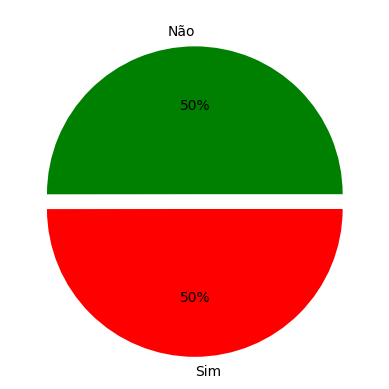

In [10]:
categororias = ["Não", "Sim"]
plt.pie(dados["smoker"].value_counts(), labels = categororias, autopct = "%.0f%%", explode= (0, 0.1), colors = ("g", "r"))
plt.show()

In [11]:
sns.set_theme(style="whitegrid", palette="muted")

ax = sns.swarmplot(data=dados_original, x="age", y="sex", hue="smoker")
ax.set(ylabel="")

Homem ou mulher.

In [ ]:
# dados_original.groupby("sex").count()

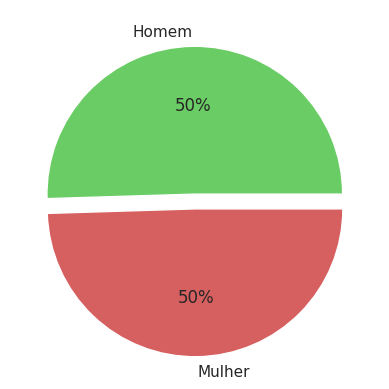

In [103]:
categororias = ["Homem", "Mulher"]
plt.pie(dados["sex"].value_counts(), labels = categororias, autopct = "%.0f%%", explode= (0, 0.1), colors = ("g", "r"))
plt.show()

Relação BMI e sexo

/tmp/ipykernel_52789/4045041492.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='bmi', data=dados_original, palette='hls')


<Axes: xlabel='sex', ylabel='bmi'>

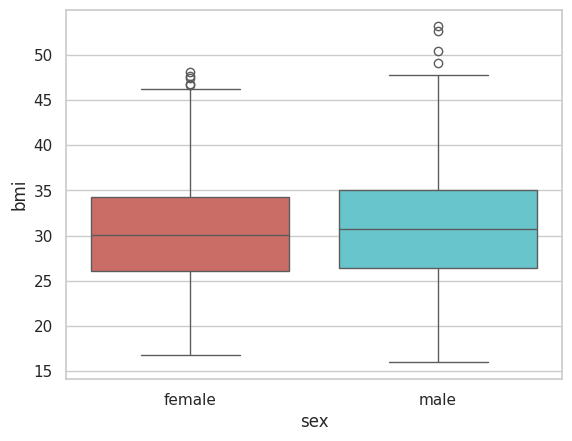

In [104]:
sns.boxplot(x='sex', y='bmi', data=dados_original, palette='hls')

Histograma da idade

<Axes: xlabel='age', ylabel='Count'>

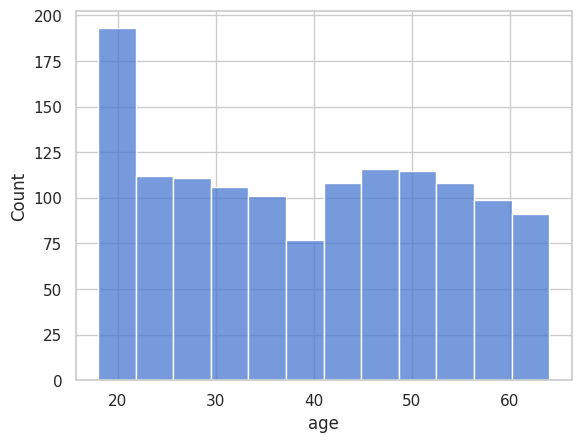

In [105]:
sns.histplot(data=dados, x="age")

<Axes: xlabel='age'>

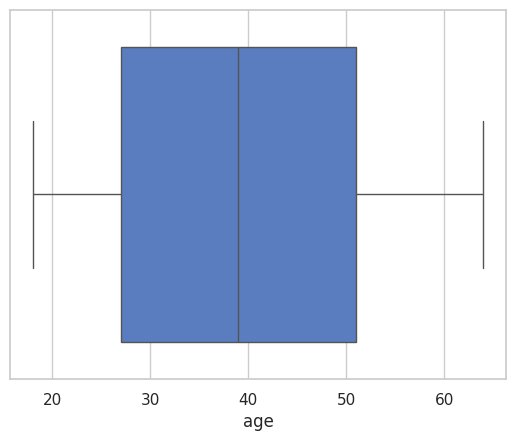

In [106]:
sns.boxplot(x=dados["age"])

Histograma do BMI

<Axes: xlabel='bmi', ylabel='Count'>

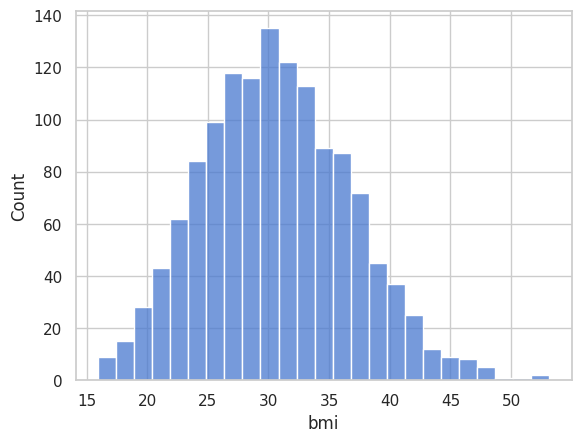

In [107]:
sns.histplot(data=dados, x="bmi")

Outliers do BMI

<Axes: xlabel='bmi'>

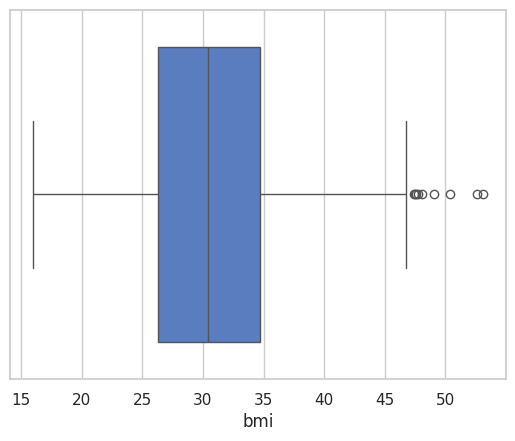

In [108]:
sns.boxplot(x=dados["bmi"])

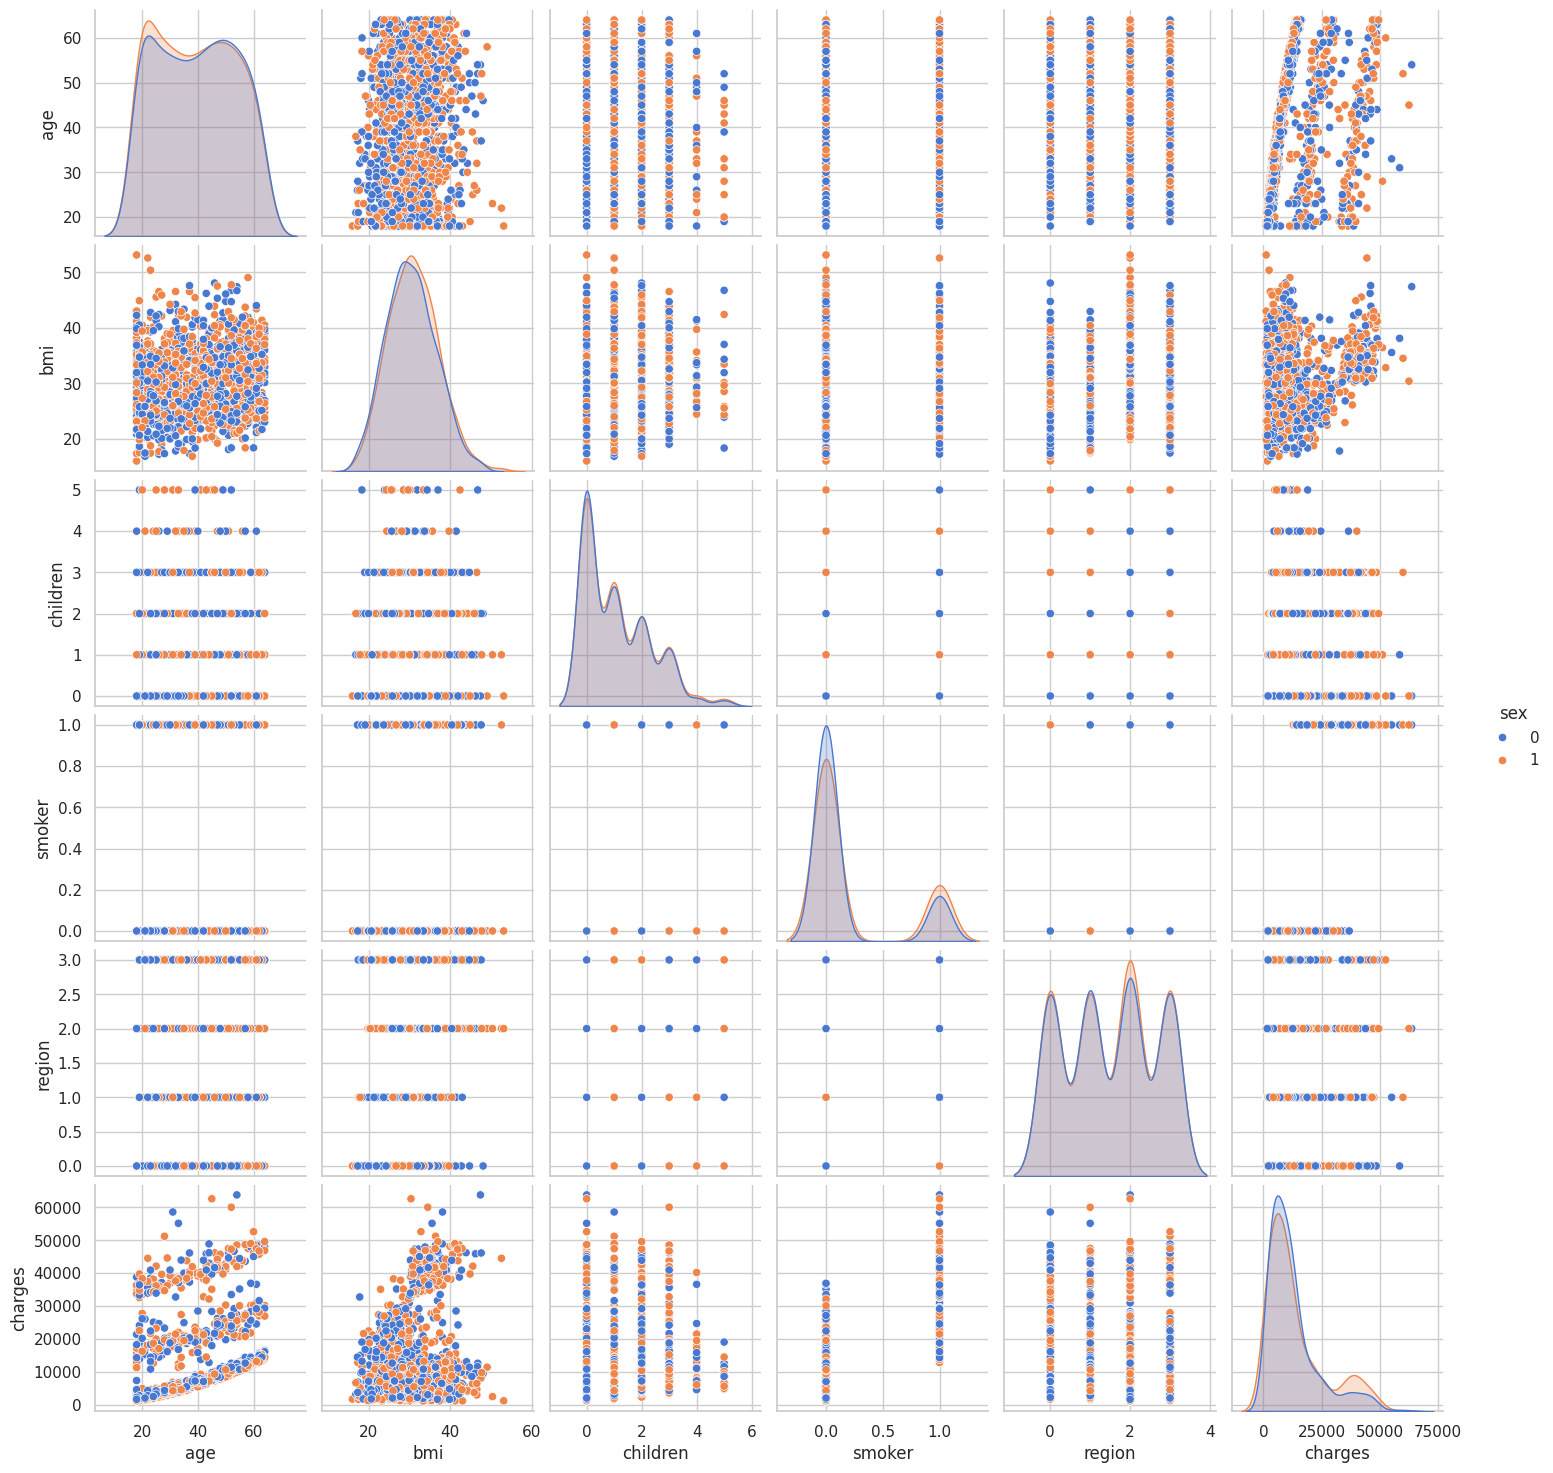

In [109]:
sns.pairplot(dados,vars=['age', 'bmi', 'children', 'smoker', 'region', 'charges'],hue="sex", )

Correlações

<Axes: >

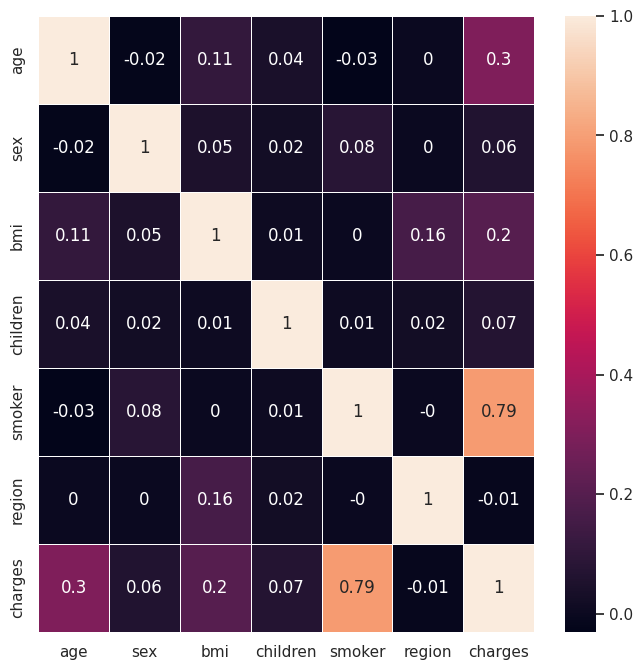

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline

correlation_matrix = dados.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))    
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

Charges

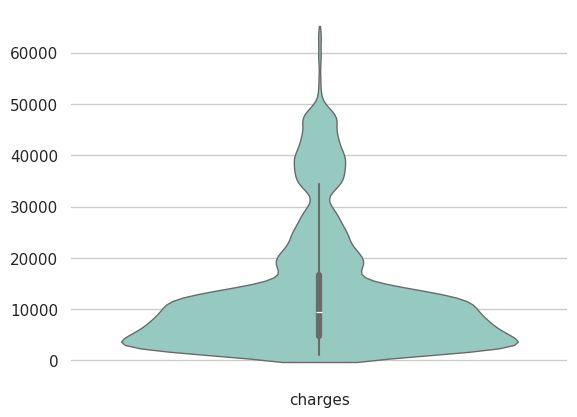

In [123]:
sns.violinplot(data=dados[['charges']], bw_adjust=.5, cut=1, linewidth=1, palette="Set3")

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

Age e BMI.

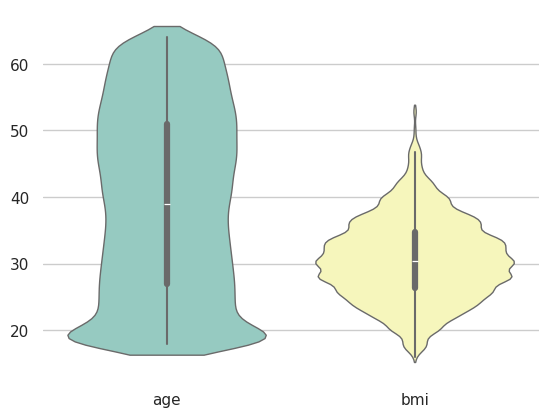

In [125]:
sns.violinplot(data=dados[['age', 'bmi']], bw_adjust=.5, cut=1, linewidth=1, palette="Set3")

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

Preparando os dados dos eixos X e Y para uso na padronização dos dados.

In [10]:
from sklearn.preprocessing import StandardScaler

features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region'] #, 'charges']
X = dados[features].values
y = dados['charges'].values

Padronização dos dados do eixo X.

In [ ]:
# X = StandardScaler().fit_transform(X)
# df_padronizado = pd.DataFrame(data=X, columns=features)
# display(df_padronizado.head())

Testando regressão linear múltipla

In [73]:
! pip install statsmodels

Treinando o modelo OLS e impmirindo as estatísticas de sua execução.

In [11]:
import statsmodels.api as sm

# Definir as variáveis independentes (X)
X = dados[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
# Definir a variável dependente (Y)
Y = dados['charges']

# Criar e ajustar o modelo de regressão linear múltipla
modelo_OLS = sm.OLS(Y, X).fit()

# Imprimir os resultados do modelo
print(modelo_OLS.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                          2.831e+06
Date:                Wed, 22 May 2024   Prob (F-statistic):                        0.00
Time:                        20:20:27   Log-Likelihood:                     -9.7331e+06
No. Observations:             1000000   AIC:                                  1.947e+07
Df Residuals:                  999994   BIC:                                  1.947e+07
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Testando a predição com base nos valores treinados.

In [25]:
#                        ['age', 'sex', 'bmi' , 'children', 'smoker', 'region']
print(modelo_OLS.predict([41   , 1    , 27.755, 0         , 0       , 1       ]))
print(modelo_OLS.predict([41   , 1    , 18.5  , 0         , 0       , 1       ]))


[11652.64038862]
[10482.52505051]


Imprimindo as estatísticas do modelo OLS.

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# realizar as previsões
y_pred_OLS = modelo_OLS.predict(X)

# Calcular MAE, MSE e RMSE
mae_OLS = mean_absolute_error(Y, y_pred_OLS)
mse_OLS = mean_squared_error(Y, y_pred_OLS)
rmse_OLS = np.sqrt(mse_OLS)

# Imprimindo as métricas
print(f'MAE: {mae_OLS}')
print(f'MSE: {mse_OLS}')
print(f'RMSE: {rmse_OLS}')

MAE: 3282.950123423186
MSE: 16657791.906269347
RMSE: 4081.395828178069


Utilizando métricas estatísticas para validar a eficácia do modelo.

* Utilizando K-Fold

In [18]:
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold 

kfold  = KFold(n_splits=5, shuffle=True)

result = cross_val_score(modelo_OLS, X, Y, cv = kfold)

print("K-Fold (R^2) Scores: {0}".format(result))
print("Mean R^2 for Cross-Validation K-Fold: {0}".format(result.mean()))

InvalidParameterError: The 'estimator' parameter of cross_val_score must be an object implementing 'fit'. Got <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7e7177886a90> instead.

Treinando o modelo OLS sem a região e impmirindo as estatísticas de sua execução.

In [19]:
import statsmodels.api as sm

# Definir as variáveis independentes (X)
X2 = dados[['age', 'sex', 'bmi', 'children', 'smoker']]
# Definir a variável dependente (Y)
Y2 = dados['charges']

# Criar e ajustar o modelo de regressão linear múltipla
modelo_OLS2 = sm.OLS(Y2, X2).fit()

# Imprimir os resultados do modelo
print(modelo_OLS2.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                          3.382e+06
Date:                Wed, 22 May 2024   Prob (F-statistic):                        0.00
Time:                        21:25:10   Log-Likelihood:                     -9.7352e+06
No. Observations:             1000000   AIC:                                  1.947e+07
Df Residuals:                  999995   BIC:                                  1.947e+07
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [24]:
#                        ['age', 'sex', 'bmi' , 'children', 'smoker']
print(modelo_OLS2.predict([41   , 1    , 27.755, 0         , 0      ]))
print(modelo_OLS2.predict([41   , 1    , 18.5  , 0         , 0      ]))


[11694.71068761]
[12465.66208561]


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# realizar as previsões
y_pred_OLS2 = modelo_OLS2.predict(X2)

# Calcular MAE, MSE e RMSE
mae_OLS2 = mean_absolute_error(Y2, y_pred_OLS2)
mse_OLS2 = mean_squared_error(Y2, y_pred_OLS2)
rmse_OLS2 = np.sqrt(mse_OLS2)

# Imprimindo as métricas
print(f'MAE: {mae_OLS2}')
print(f'MSE: {mse_OLS2}')
print(f'RMSE: {rmse_OLS2}')

MAE: 3289.4104295357265
MSE: 16725211.184559563
RMSE: 4089.6468288300352
